## Visualização de Dados e Design de Dashboards

**Capítulo 2 - Métodos de Visualização**
**Exemplos de Gráficos Padrões**

Neste Colab terá exemplos de gráficos 

## Pacotes Python para Manipulação de Dados e Visualização
Certifique-se de usar os pacotes nas mesmas versões mostradas abaixo.

In [127]:
# Instalando pacote watermark
!pip install -q -U watermark

In [128]:
# Manipulação de Dados
import numpy as np
import pandas as pd
import datetime
from datetime import date, timedelta

# Visualização com Plotly
import plotly.express as px
import plotly.graph_objects as go
import plotly.figure_factory as ff
from plotly.colors import n_colors
from plotly.subplots import make_subplots

# Wordcloud
import wordcloud
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Supress warnings
import sys
import warnings

if not sys.warnoptions:
  warnings.simplefilter("ignore")

In [129]:
# Versões dos pacotes usados neste jupyter Notebook
%reload_ext watermark
%watermark -a 'Analista - Alexsander Maia Simas' --iversions

Author: Analista - Alexsander Maia Simas

google    : 2.0.3
numpy     : 1.21.6
matplotlib: 3.2.2
plotly    : 5.5.0
pandas    : 1.3.5
sys       : 3.7.13 (default, Apr 24 2022, 01:04:09) 
[GCC 7.5.0]
wordcloud : 1.8.2.2



### Carregando os dados

In [130]:
titanic = pd.read_csv('titanic-train.csv')
titanic.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [131]:
netflix = pd.read_csv('netflix-shows-netflix_titles.csv')
netflix.head(5)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,81145628,Movie,Norm of the North: King Sized Adventure,"Richard Finn, Tim Maltby","Alan Marriott, Andrew Toth, Brian Dobson, Cole...","United States, India, South Korea, China","September 9, 2019",2019,TV-PG,90 min,"Children & Family Movies, Comedies",Before planning an awesome wedding for his gra...
1,80117401,Movie,Jandino: Whatever it Takes,NaN,Jandino Asporaat,United Kingdom,"September 9, 2016",2016,TV-MA,94 min,Stand-Up Comedy,Jandino Asporaat riffs on the challenges of ra...
2,70234439,TV Show,Transformers Prime,NaN,"Peter Cullen, Sumalee Montano, Frank Welker, J...",United States,"September 8, 2018",2013,TV-Y7-FV,1 Season,Kids' TV,"With the help of three human allies, the Autob..."
3,80058654,TV Show,Transformers: Robots in Disguise,NaN,"Will Friedle, Darren Criss, Constance Zimmer, ...",United States,"September 8, 2018",2016,TV-Y7,1 Season,Kids' TV,When a prison ship crash unleashes hundreds of...
4,80125979,Movie,#realityhigh,Fernando Lebrija,"Nesta Cooper, Kate Walsh, John Michael Higgins...",United States,"September 8, 2017",2017,TV-14,99 min,Comedies,When nerdy high schooler Dani finally attracts...


In [132]:
world = pd.read_csv('world-university-rankings-cwurData.csv')
world.head(5)

,world_rank,institution,country,national_rank,quality_of_education,alumni_employment,quality_of_faculty,publications,influence,citations,broad_impact,patents,score,year
0,1,Harvard University,USA,1,7,9,1,1,1,1,NaN,5,100.00,2012
1,2,Massachusetts Institute of Technology,USA,2,9,17,3,12,4,4,NaN,1,91.67,2012
2,3,Stanford University,USA,3,17,11,5,4,2,2,NaN,15,89.50,2012
3,4,University of Cambridge,United Kingdom,1,10,24,4,16,16,11,NaN,50,86.17,2012
4,5,California Institute of Technology,USA,4,2,29,7,37,22,22,NaN,18,85.21,2012


In [133]:
google = pd.read_csv('google-play-store-apps-googleplaystore.csv')
google.head(5)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [134]:
covid = pd.read_csv('novel-corona-virus-2019-dataset-covid_19_data.csv')
covid.head(5)

,SNo,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
0,1,01/22/2020,Anhui,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
1,2,01/22/2020,Beijing,Mainland China,1/22/2020 17:00,14.0,0.0,0.0
2,3,01/22/2020,Chongqing,Mainland China,1/22/2020 17:00,6.0,0.0,0.0
3,4,01/22/2020,Fujian,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
4,5,01/22/2020,Gansu,Mainland China,1/22/2020 17:00,0.0,0.0,0.0


In [135]:
covid_line = pd.read_csv('novel-corona-virus-2019-dataset-COVID19_line_list_data.csv')
covid_line.head(5)

,id,case_in_country,reporting date,Unnamed: 3,summary,location,country,gender,age,symptom_onset,...,recovered,symptom,source,link,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25,Unnamed: 26
0,1,NaN,1/20/2020,NaN,First confirmed imported COVID-19 pneumonia pa...,"Shenzhen, Guangdong",China,male,66.0,01/03/20,...,0,NaN,Shenzhen Municipal Health Commission,http://wjw.sz.gov.cn/wzx/202001/t20200120_1898...,NaN,NaN,NaN,NaN,NaN,NaN
1,2,NaN,1/20/2020,NaN,First confirmed imported COVID-19 pneumonia pa...,Shanghai,China,female,56.0,1/15/2020,...,0,NaN,Official Weibo of Shanghai Municipal Health Co...,https://www.weibo.com/2372649470/IqogQhgfa?fro...,NaN,NaN,NaN,NaN,NaN,NaN
2,3,NaN,1/21/2020,NaN,First confirmed imported cases in Zhejiang: pa...,Zhejiang,China,male,46.0,01/04/20,...,0,NaN,Health Commission of Zhejiang Province,http://www.zjwjw.gov.cn/art/2020/1/21/art_1202...,NaN,NaN,NaN,NaN,NaN,NaN
3,4,NaN,1/21/2020,NaN,new confirmed imported COVID-19 pneumonia in T...,Tianjin,China,female,60.0,NaN,...,0,NaN,人民日报官方微博,https://m.weibo.cn/status/4463235401268457?,NaN,NaN,NaN,NaN,NaN,NaN
4,5,NaN,1/21/2020,NaN,new confirmed imported COVID-19 pneumonia in T...,Tianjin,China,male,58.0,NaN,...,0,NaN,人民日报官方微博,https://m.weibo.cn/status/4463235401268457?,NaN,NaN,NaN,NaN,NaN,NaN


## Gráfico de Barras Simples
**Objetivo**: Exibe a representação quantitativa de uma variável. 

Quais países tem universidades com pontuação superior a 70?

In [136]:
# Preparando os dados
top_countries = world[world['score'] > 70]['country'].value_counts().reset_index().rename(columns = {'index':'country', 'country':'count'})

In [137]:
# Cria a figura
fig = go.Figure(go.Bar(x = top_countries['country'], y = top_countries['count'],))

# Configura o layout
fig.update_layout(title_text = 'Países com Universidades com Pontuação Superior a 70',
                  xaxis_title = 'País', 
                  yaxis_title = 'Número de Universidades')

# Mostrando o gráfico
fig.show()

## Gráfico de Barras - Gradiente de Cores e Posicionamento de Texto
**Objetivo**: Exibe a representação quantitativa de uma variável destacando as contagens com gradiente de cor e posição do texto para todas as barras.

Em que gênero se enquandra a maioria dos aplicativos da Google Play Store?

In [138]:
# Preparando os dados
apps = google['Genres'].value_counts()[:10].to_frame().reset_index().rename(columns = {'index':'Genres', 'Genres':'Count'})

In [139]:
# Cria a figura e formata o gradiente de cores
fig = go.Figure(go.Bar(x = apps['Genres'],
                       y = apps['Count'],
                       marker = {'color':apps['Count'], 'colorscale':'Viridis'},
                       text = apps['Count'],
                       textposition = 'outside',))

# Configura o layout
fig.update_layout(title_text = 'Top Apps da Google Playstore',
                  xaxis_title = 'Gêneros de Aplicativos',
                  yaxis_title = 'Números de Apps')

# Mostra o gráfico
fig.show()

### Gráfico de Barras Empilhado
**Objetivo**: Exibe a representação quantitativa de uma variável agrupando/empilhando as barras.

Quando programas / filmes foram lançados na Netflix do Brasil e dos Estados Unidos entre 2015 e 2020?

In [140]:
# Agrupamento dos dados
top_release_brazil = netflix[(netflix['country']=='Brazil')&
                    ((netflix['release_year']==2015)|(netflix['release_year']==2016)|(netflix['release_year']==2017)|(netflix['release_year']==2018)|
                    (netflix['release_year']==2019)|(netflix['release_year']==2020))]['release_year'].value_counts().to_frame().reset_index().rename(columns={'index':'release_year','release_year':'count'})

top_release_us = netflix[(netflix['country']=='United States')&
                    ((netflix['release_year']==2015)|(netflix['release_year']==2016)|(netflix['release_year']==2017)|(netflix['release_year']==2018)|
                    (netflix['release_year']==2019)|(netflix['release_year']==2020))]['release_year'].value_counts().to_frame().reset_index().rename(columns={'index':'release_year','release_year':'count'})

In [141]:
# Criando a figura
fig = go.Figure()

# Formatando as barras por agrupamento
fig.add_trace(go.Bar(x = top_release_brazil['release_year'],
                     y = top_release_brazil['count'],
                     name = 'Brasil',
                     marker_color = 'violet'))

fig.add_trace(go.Bar(x = top_release_us['release_year'],
                     y = top_release_us['count'],
                     name = 'Estados Unidos',
                     marker_color = 'blue'))

# Formata o layout
fig.update_layout(title_text = 'Filmes e Programas Lançados na Netflix do Brasil/ EUA entre 2015 e 2020',
                  xaxis_title = 'Ano',
                  yaxis_title = 'Número de Filmes/Programas',
                  barmode = 'stack')

# Mostrar o gráfico
fig.show()

## Gráfico de Barras Facetado

**Objetivo**: Exibe uma visão diferentes características categóricas em relação a uma variável numérica.

Qual a soma da tarifa(variável fare) por sexo dos passageiros em cada classe e seus embarcados no dataset Titanic?

*   Variável facetárias: Survived, Pclass
*   Barras agrupadas: Embarked
*   Numérico único(eixo Y) - Fare

In [142]:
# Preparando os dados
facet_titanic = titanic[['Sex', 'Survived', 'Embarked','Pclass', 'Fare']].groupby(['Sex', 'Survived', 'Embarked', 'Pclass']).agg('sum').reset_index()

In [143]:
# Cria o facet
fig = px.bar(facet_titanic, 
             x = 'Sex',
             y = 'Fare',
             color = 'Embarked', 
             barmode= 'group',
             facet_row = 'Survived',
             facet_col = 'Pclass',)

# Layout
fig.update_layout(title_text = 'Vista Facetada da tarifa dos passageiros do Titanic em Relação à idade, classe, embarque\n')

# Mostar o gráfico
fig.show()

## Gráfico de Barras Horizontal
**Objetivo**: Exibe a representação quantitativa de uma variável de maneira horizontal.

Quantos aplicativos da Playstore se enquadram em cada categoria?

In [144]:
# Preparando os dados
app_category = google['Category'].value_counts()[:15].reset_index().rename(columns = {'index':'Category', 'Category':'Count'}).sort_values('Count', ascending = 'False')

In [145]:
# Cria a figura com orientação horizontal
fig = go.Figure(go.Bar(y = app_category['Category'], x = app_category['Count'], orientation = 'h'))

# Layout
fig.update_layout(title_text = '15 Principais Categorias de Aplicativos da Google Playstore',
                  xaxis_title = 'Total de Apps',
                  yaxis_title = 'Categoria')

# Mostra o gráfico
fig.show()

## Gráfico de Linhas

**Objetivo**: Relação entre variáveis ao longo do tempo.

Quantas mortes por COVID foram observadas ao longo do tempo?

In [146]:
# Prepara os dados
total_confirmed = covid[['ObservationDate', 'Deaths']].groupby('ObservationDate').sum().reset_index()

In [147]:
# Cria a figura
fig = go.Figure(data = go.Scatter(x = total_confirmed['ObservationDate'],
                                  y = total_confirmed['Deaths'],
                                  mode = 'lines'))

# Layout
fig.update_layout(title = 'Número de Mortes por COVID ao Longo do Tempo',
                 xaxis_title = 'Data',
                 yaxis_title = 'Número de Casos')

# Mostrando o gráfico
fig.show()

## Gráfico de Pizza

**Objetivo**: Exibe representação quantitativa (contagem) e proporcional de variáveis categóricas.

Qual a proporção de tipos de programas da Netflix?

In [148]:
# Preparando os dados
net_category = netflix['type'].value_counts().to_frame().reset_index().rename(columns = {'index':'type', 'type':'count'})

In [149]:
# Cria a figura
fig = go.Figure([go.Pie(labels = net_category['type'], values = net_category['count'])])

# Interatividade
fig.update_traces(hoverinfo = 'label+percent', 
                  textinfo = 'value+percent', 
                  textfont_size = 15,
                  insidetextorientation = 'radial')

# Layout
fig.update_layout(title = "Tipos de Programas na Netflix", title_x = 0.5)

# Gráfico
fig.show()

## Gráfico de Pizza com Cores Customizadas

**Objetivos**: Exibe representação quantitativa em pizza com cores personalizadas para os rótulos.

Qual a proporção de passageiros do Titanic por faixa etária?

In [150]:
# Prepara os dados
titanic = titanic.dropna()

titanic['age_category'] = np.where((titanic['Age'] < 19), "Abaixo de 19 Anos",
                                   np.where((titanic['Age'] > 18)&(titanic['Age'] <= 30), "19-30 Anos",
                                    np.where((titanic['Age'] > 30)&(titanic['Age']<=50), "31-50 Anos",
                                             np.where(titanic['Age'] > 50, "Acima de 50 Anos","NULL"))))

age = titanic['age_category'].value_counts().to_frame().reset_index().rename(columns = {'index':'age_category','age_category':'Count'})

titanic_age = titanic['age_category'].value_counts().to_frame().reset_index().rename(columns={'index':'age_category','age_category':'count'})

In [151]:
# Lista de cores
colors = ['green', 'violet', 'yellow', 'blue']

In [152]:
# Gráfico
fig = go.Figure([go.Pie(labels = titanic_age['age_category'], values = titanic_age['count'])])

# Interatividade
fig.update_traces(hoverinfo = 'label+percent',
                  textinfo = 'percent+label',
                  textfont_size = 16,
                  marker = dict(colors = colors, line = dict(color = '#000360', width = 2)))

fig.update_layout(title = 'Passageiros do Titanic por faixa Etária', title_x = 0.5)
fig.show()

## Gráfico de Rosca(Donut)
**Objetivo**: Exibe representação quantitativa em formato de rosca.

Qual é a contagem de distribuição da classificação de contéudo de aplicativos do google playstore?

In [153]:
# Prepara os dados
content = google['Content Rating'].value_counts().to_frame().reset_index().rename(columns = {'index':'Content Rating', 'Content Rating':'count'})

In [154]:
# Figura 
fig = go.Figure([go.Pie(labels = content['Content Rating'], values = content['count'], hole = 0.3)])

# Interatividade
fig.update_traces(hoverinfo = 'label+percent',
                  textinfo = 'percent',
                  textfont_size = 12)

#Layout
fig.update_layout(title = 'Classificação de Contéudo do Google Apps', title_x = 0.5)

# Gráfico
fig.show()

## Bubble Plot

**Objetivo**: Exibe representação quantitativa destacando a categoria mais ocorrida com o tamanho da bolha.

Quantas pessoas viajaram em cada classe de passageiros do Titanic?

In [155]:
titanic_bola = pd.read_csv('titanic-train.csv')
titanic.sample()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,age_category
577,578,1,1,"Silvey, Mrs. William Baird (Alice Munger)",female,39.0,1,0,13507,55.9,E44,S,31-50 Anos


In [156]:
# Prepara os dados
pclass = titanic_bola['Pclass'].value_counts().to_frame().reset_index().rename(columns = {'index': 'Pclass', 'Pclass':'Count'})
pclass.head(3)

,Pclass,Count
0,3,491
1,1,216
2,2,184


In [157]:
# Figura
fig = go.Figure(data = [go.Scatter(x = pclass['Pclass'],
                                   y = pclass['Count'],
                                   mode = 'markers',
                                   marker = dict(size = pclass['Count']*0.3))])

# Layout
fig.update_layout(title = 'Viajantes por Classes do Titanic',
                  xaxis_title = "Classe",
                  yaxis_title = "Número de Pessoas")

# Mostrar o gráfico
fig.show()

## Bubble Plot com Gradiente de Cor

**Objetivo**: Exibe uma representação quantitativa destacando a categoria mais ocorrida com o gradiente de cor da bolha.

Quantas pessoas viajaram no Titanic por faixa etária?

In [158]:
# Prepara os dados
titanic_bola = titanic.dropna()

titanic_bola['age_category'] = np.where((titanic_bola['Age'] < 19), 'Abaixo de 19 Anos',
                                        np.where((titanic_bola['Age'] > 18)&(titanic_bola['Age'] <= 30), "19-30 Anos",
                                                 np.where((titanic_bola['Age'] > 30)&(titanic_bola['Age'] <= 50), "31-50 Anos",
                                                          np.where(titanic['Age'] > 50, "Acima de 50 anos", "NULL"))))

age = titanic_bola['age_category'].value_counts().to_frame().reset_index().rename(columns = {'index':'age_category', 'age_category':'Count'})

In [159]:
# Figura
fig = go.Figure(data = [go.Scatter(x = age['age_category'],
                                   y = age['Count'],
                                   mode = 'markers',
                                   marker = dict(color = age['Count'],
                                                 size = age['Count'],
                                                 showscale = True))])

# Layout
fig.update_layout(title = "Viajante do Titanic por faixa etária",
                   xaxis_title = "Faixa Etária",
                   yaxis_title = "Número de Pessoas")

# Mostra o gráfico
fig.show()

## Waterfall

**Objetivo**: Exibir aumento e diminuição de contagens no gráfico em cascata

Apresente um resumo dos casos de Covid nos meses de Junho e Julho nos EUA!

In [160]:
# Carrega os dados
covid_water = pd.read_csv('novel-corona-virus-2019-dataset-covid_19_data.csv')

In [161]:
# Ajusta coluna de data
covid_water['ObservationDate'] = pd.to_datetime(covid['ObservationDate'])
covid_water['month'] = covid_water['ObservationDate'].dt.month_name() 

In [162]:
# Prepara os dados
us_confirmado_julho = covid_water[(covid_water['Country/Region']=='US') & (covid_water['month']=='July')][['month', 'Confirmed']].groupby('month').sum().reset_index()['Confirmed']
us_confirmado_junho = covid_water[(covid_water['Country/Region']=='US') & (covid_water['month']=='June')][['month', 'Confirmed']].groupby('month').sum().reset_index()['Confirmed']
us_recuperado_julho = covid_water[(covid_water['Country/Region']=='US') & (covid_water['month']=='July')][['month', 'Recovered']].groupby('month').sum().reset_index()['Recovered']
us_recuperado_junho = covid_water[(covid_water['Country/Region']=='US') & (covid_water['month']=='June')][['month', 'Recovered']].groupby('month').sum().reset_index()['Recovered']
us_mortes_julho = covid_water[(covid_water['Country/Region']=='US') & (covid_water['month']=='July')][['month', 'Deaths']].groupby('month').sum().reset_index()['Deaths']
us_mortes_junho = covid_water[(covid_water['Country/Region']=='US') & (covid_water['month']=='June')][['month', 'Deaths']].groupby('month').sum().reset_index()['Deaths']

In [163]:
# Figura
fig = go.Figure(go.Waterfall(name = "Casos de Covid",
                             orientation = 'v', 
                             measure = ['relative',
                                        'relative',
                                        'total',
                                        'relative',
                                        'relative',
                                        'total'],
                             x = ["Junho Confirmado",
                                  "Julho Confirmado",
                                  "Total Confirmado",
                                  "Junho Recuperados e/ou Mortos",
                                  "Julho Recuperados e/ou Mortos",
                                  "Total sob Observação"],
                             y = [int(us_confirmado_junho),
                                  int(us_confirmado_julho),
                                  0,
                                  -(int(us_mortes_junho) + int(us_recuperado_junho)),
                                  -int((us_mortes_julho) + int(us_recuperado_julho)),
                                  0],
                             connector = {'line':{'color':'rgb(63,63,63)'}},))

# Layout
fig.update_layout(title = 'Casos de Covid em Junho e Julho nos EUA', showlegend = True)
fig.show()

## Waterfall Múltiplo

**Objetivo**: Exibir aumento e diminuição de contagens no gráfico em cascata.

Apresente o mesmo gráfico anterior para os EUA e Brasil na mesma área de plotagem. 

In [164]:
# Já temos os dados dos EUA, agora preparamos os dados do Brasil
br_confirmado_julho = covid_water[(covid_water['Country/Region']=='Brazil') & (covid_water['month']=='July')][['month', 'Confirmed']].groupby('month').sum().reset_index()['Confirmed']
br_confirmado_junho = covid_water[(covid_water['Country/Region']=='Brazil') & (covid_water['month']=='June')][['month', 'Confirmed']].groupby('month').sum().reset_index()['Confirmed']
br_recuperados_julho = covid_water[(covid_water['Country/Region']=='Brazil') & (covid_water['month']=='July')][['month', 'Recovered']].groupby('month').sum().reset_index()['Recovered']
br_recuperados_junho = covid_water[(covid_water['Country/Region']=='Brazil') & (covid_water['month']=='June')][['month', 'Recovered']].groupby('month').sum().reset_index()['Recovered']
br_mortos_julho = covid_water[(covid_water['Country/Region']=='Brazil') & (covid_water['month']=='July')][['month', 'Deaths']].groupby('month').sum().reset_index()['Deaths']
br_mortos_junho = covid_water[(covid_water['Country/Region']=='Brazil') & (covid_water['month']=='July')][['month', 'Deaths']].groupby('month').sum().reset_index()['Deaths']

In [165]:
# Figura
fig = go.Figure()

# Adiciona a camada com o waterfall dos EUA
fig.add_trace(go.Waterfall(x = [['June',
                                 'June',
                                 'June',
                                 'June',
                                 'July',
                                 'July',
                                 'July',
                                 'July'],
                                ['June Confirmed',
                                 'June Recovered',
                                 'June Death',
                                 'Total Observation',
                                 'July Confirmed',
                                 'July Recovered',
                                 'July Death',
                                 'Total Observation']],
                           measure = ['relative',
                                      'relative',
                                      'relative',
                                      'total',
                                      'relative',
                                      'relative',
                                      'relative',
                                      'total'],
                           y = [int(us_confirmado_junho),
                                -int(us_recuperado_junho),
                                -int(us_mortes_junho),
                                None,
                                int(us_confirmado_junho),
                                -int(us_recuperado_julho),
                                -int(us_mortes_julho),
                                None],
                           name = 'EUA'))

# Adiciona a camada com o waterfall do Brasil 
fig.add_trace(go.Waterfall(x = [['June',
                                 'June',
                                 'June',
                                 'June',
                                 'July',
                                 'July',
                                 'July',
                                 'July'],
                                ['June Confirmed',
                                 'June Recovered',
                                 'June Death',
                                 'Total Observation',
                                 'July Confirmed',
                                 'July Recovered',
                                 'July Death',
                                 'Total Observation']],
                           measure = ['relative',
                                      'relative',
                                      'relative',
                                      'total',
                                      'relative',
                                      'relative',
                                      'relative',
                                      'total'],
                           y = [int(br_confirmado_junho),
                                -int(br_recuperados_junho),
                                -int(br_mortos_junho),
                                None,
                                int(br_confirmado_julho),
                                -int(br_recuperados_julho),
                                -int(br_mortos_julho),
                                None],
                           name = "Brasil"))

# Layout
fig.update_layout(title = "Casos de Covid em Junho e Julho nos EUA e Brasil",
                  waterfallgroupgap = 0.5,)

fig.show()

## Gráficos Espaciais e Mapas - Todos os exemplos 



In [166]:
# Carregando os dados
tiro = pd.read_csv('police-violence-in-the-us-shootings_wash_post.csv')
tiro.head(5)

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera
0,3,Tim Elliot,2015-01-02,shot,gun,53.0,M,A,Shelton,WA,True,attack,Not fleeing,False
1,4,Lewis Lee Lembke,2015-01-02,shot,gun,47.0,M,W,Aloha,OR,False,attack,Not fleeing,False
2,5,John Paul Quintero,2015-01-03,shot and Tasered,unarmed,23.0,M,H,Wichita,KS,False,other,Not fleeing,False
3,8,Matthew Hoffman,2015-01-04,shot,toy weapon,32.0,M,W,San Francisco,CA,True,attack,Not fleeing,False
4,9,Michael Rodriguez,2015-01-04,shot,nail gun,39.0,M,H,Evans,CO,False,attack,Not fleeing,False


In [167]:
# Carregando os dados
terror = pd.read_csv('globalterrorismdb_0718dist.csv', encoding = 'ISO-8859-1')
terror.head(5)

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning:

Columns (4,6,31,33,61,62,63,76,79,90,92,94,96,114,115,121) have mixed types.Specify dtype option on import or set low_memory=False.



,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN


In [168]:
# Carregando os dados
brasil = pd.read_csv('brazilian-ecommerce-olist_geolocation_dataset.csv')
brasil.head(5)

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.545621,-46.639292,sao paulo,SP
1,1046,-23.546081,-46.644820,sao paulo,SP
2,1046,-23.546129,-46.642951,sao paulo,SP
3,1041,-23.544392,-46.639499,sao paulo,SP
4,1035,-23.541578,-46.641607,sao paulo,SP


### Choropleth Maps
**Objetivo**: Exibir mapa de calor por contagem.

Qual o volume de mortes de pessoas negras em todos os estados dos EUA?

In [169]:
# Pegando colunas do dataset TIRO
tiro.columns

Index(['id', 'name', 'date', 'manner_of_death', 'armed', 'age', 'gender',
       'race', 'city', 'state', 'signs_of_mental_illness', 'threat_level',
       'flee', 'body_camera'],
      dtype='object')

In [170]:
# Preparando os dados
black_state = tiro[tiro['race'] =='B']['state'].value_counts().to_frame().reset_index().rename(columns = {'index':'state', 'state':'count'})

In [171]:
# Figura
fig = go.Figure(go.Choropleth(locations = black_state['state'],
                              z = black_state['count'].astype(float),
                              locationmode = 'USA-states',
                              colorscale = 'Reds',
                              autocolorscale = False,
                              text = black_state['state'],
                              marker_line_color = 'white',
                              colorbar_title = 'Milhões USD',
                              showscale = False,))

# Layout
fig.update_layout(title_text = 'Mortes de Negros por Estado (2015-2020)',
                  title_x = 0.5,
                  geo = dict(scope = 'usa',
                             projection = go.layout.geo.Projection(type = 'albers usa'),
                             showlakes = True,
                             lakecolor = 'rgb(255, 255, 255)'))

# Template de cores
fig.update_layout(template = "plotly_dark")

# Gráfico
fig.show()

## Mapbox com Linhas
**Objetivo**: Exibir limites e densidade por linhas usando latitude e longitude.

Como as fronteiras do comércio eletrônico são estendidas para três estados do Brasil- AC, MA e AP?

In [172]:
brasil.columns

Index(['geolocation_zip_code_prefix', 'geolocation_lat', 'geolocation_lng',
       'geolocation_city', 'geolocation_state'],
      dtype='object')

In [173]:
# Preparando os dados
states = brasil[(brasil['geolocation_state']=='AC')|(brasil['geolocation_state']=='MA')|(brasil['geolocation_state']=='AP')]

In [174]:
# Figura
fig = px.line_mapbox(states,
                     lat = "geolocation_lat",
                     lon = "geolocation_lng",
                     color = "geolocation_state",
                     zoom = 3,
                     height = 300)

# Layout
fig.update_layout(mapbox_style = "stamen-terrain",
                  mapbox_zoom = 2,
                  mapbox_center_lat = -11,
                  margin = {'r':0, 't':0, 'l':0, 'b':0})

# Gráfico
fig.show()

### Bubble Maps
**Objetivo**: Exibir densidade de valores com bolhas sobre latitude e longitude.

Quantas pessoas foram mortas em ataques terroristas em cada Estado dos EUA?

In [175]:
# Pegando os nomes das colunas
terror.columns

Index(['eventid', 'iyear', 'imonth', 'iday', 'approxdate', 'extended',
       'resolution', 'country', 'country_txt', 'region',
       ...
       'addnotes', 'scite1', 'scite2', 'scite3', 'dbsource', 'INT_LOG',
       'INT_IDEO', 'INT_MISC', 'INT_ANY', 'related'],
      dtype='object', length=135)

In [176]:
# Preparando os dados
us_terror = terror.loc[(terror['country_txt']=='United States')&(terror['provstate']!='Unknown')][['provstate','latitude','longitude','nkill']]
map_terror = us_terror.groupby(['provstate']).agg({'nkill':'sum', 'latitude':'mean','longitude':'mean'}).reset_index()

In [177]:
# Parâmetros para os gráficos
limits = [(0,5), (6,15), (16,3000)]
colors = ["royalblue", "crimson", "lightseagreen"]
cities = []
scale = 1

In [178]:
# Figura
fig = go.Figure()

# Loop para configuração dos parâmetros associados aos dados
for i in range(len(limits)):
    lim = limits[i]
    df_sub = map_terror[lim[0]:lim[1]]
    fig.add_trace(go.Scattergeo(locationmode = 'USA-states',
                                lon = df_sub['longitude'],
                                lat = df_sub['latitude'],
                                marker = dict(size = df_sub['nkill'] / scale,
                                              color = colors[i],
                                              line_color = 'rgb(40,40,40)',
                                              line_width = 0.5,
                                              sizemode = 'area'),
        name = '{0} - {1}'.format(lim[0],lim[1])))

fig.update_layout(title_text = 'Ataques Terroristas nos EUA',
                  title_x = 0.5,
                  showlegend = True,
                  geo = dict(scope = 'usa',
                             landcolor = 'rgb(217, 217, 217)'))

# Gráfico
fig.show()

### Mapbox Density
**Objetivo**: Exibir densidade de valores com mapa de calor sobre latitude e longitude.

Quantas pessoas foram mortas em ataques terroristas em todo o mundo?

In [179]:
# Pegando as colunas
terror.head()

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN


In [180]:
# Prepara os dados
all_terror = terror[['city', 'latitude', 'longitude','nkill']]
map_all_terror = all_terror.groupby(['latitude', 'longitude']).agg({'nkill':'sum'}).reset_index()

In [181]:
# Mapbox
fig = px.density_mapbox(map_all_terror,
                        lat = 'latitude',
                        lon = 'longitude',
                        z = 'nkill',
                        radius = 10,
                        center = dict(lat = 31, lon = 36), zoom = 1, mapbox_style='stamen-terrain')

# Layout
fig.update_layout(title_text = 'Pessoas mortas em Ataques terroristas ao redor do Mundo',
                  title_x = 0.5,
                  showlegend = True)

# Gráfico
fig.show()

### Mapbox Layers
**Objetivo**: Exibir pontos de latitude e longitude.

Qual o total de lojas nos estados RO, AM, AC, AP, RR, no Brasil?

In [182]:
# Olhando as 5 primeiras linhas para fazer o slicing
brasil.head(5)

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.545621,-46.639292,sao paulo,SP
1,1046,-23.546081,-46.644820,sao paulo,SP
2,1046,-23.546129,-46.642951,sao paulo,SP
3,1041,-23.544392,-46.639499,sao paulo,SP
4,1035,-23.541578,-46.641607,sao paulo,SP


In [183]:
# Preparando os dados
brasil_5 = brasil[(brasil['geolocation_state']=='RO')|(brasil['geolocation_state']=='AM')|(brasil['geolocation_state']=='AC')|(brasil['geolocation_state']=='AP')|(brasil['geolocation_state']=='RR')]

In [184]:
# Figura
fig = px.scatter_mapbox(brasil_5,
                        lat = 'geolocation_lat',
                        lon = 'geolocation_lng',
                        hover_name = 'geolocation_city',
                        hover_data = ['geolocation_state'],
                        color_discrete_sequence= ['fuchsia'],
                        zoom = 2,
                        center = dict(lat = -18, lon = -52),
                        height = 300)

# Layout
fig.update_layout(mapbox_style = 'open-street-map')
fig.update_layout(margin = {'r':0,'t':0,'l':0,'b':0})

# Mostrando
fig.show()

## Gráficos Estatísticos - Análise Estatística

In [185]:
# Carregando os dados
campus = pd.read_csv('factors-affecting-campus-placement-Placement_Data_Full_Class.csv')
campus.head()

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
1,2,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
2,3,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0
3,4,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,NaN
4,5,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0


In [186]:
# Carrega os dados
lar = pd.read_csv('house-prices-advanced-regression-techniques-train.csv')
lar.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [187]:
# Carrega os dados
world = pd.read_csv('world-university-rankings-cwurData.csv')
world.head()

,world_rank,institution,country,national_rank,quality_of_education,alumni_employment,quality_of_faculty,publications,influence,citations,broad_impact,patents,score,year
0,1,Harvard University,USA,1,7,9,1,1,1,1,NaN,5,100.00,2012
1,2,Massachusetts Institute of Technology,USA,2,9,17,3,12,4,4,NaN,1,91.67,2012
2,3,Stanford University,USA,3,17,11,5,4,2,2,NaN,15,89.50,2012
3,4,University of Cambridge,United Kingdom,1,10,24,4,16,16,11,NaN,50,86.17,2012
4,5,California Institute of Technology,USA,4,2,29,7,37,22,22,NaN,18,85.21,2012


In [188]:
# Usaremos também o dataset google
google.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


### Histograma
**Objetivo**: Exibir distribuição de uma variável contínua.

Qual é a situação salarial dos graduados em Computação?

In [189]:
# Preparando os dados para Análise
campus_computer = campus[campus['degree_t']=='Comm&Mgmt'].dropna()['salary']

In [190]:
# Figura
fig = go.Figure(data = [go.Histogram(x = campus_computer,
                                     marker_color = 'orange',
                                     xbins = dict(start = 200000, end = 1000000, size = 10000))])

# Layout
fig.update_layout(title = 'Distribuição de Salários para Graduados em Computação',
                  xaxis_title = 'Salário',
                  yaxis_title = 'Frequência')

# Mostrando figura
fig.show()

# Histograma Normalizado
**Objetivo**: Exibir distribuição de uma variável contínua.

Qual a distribuição salarial dos graduados em Ciência e Tecnologia de forma normalizada?

In [191]:
# Preparando os dados
campus_science = campus[campus['degree_t']=='Sci&Tech']['salary']

In [192]:
# Figura
fig = go.Figure(data = [go.Histogram(x = campus_science,
                                     histnorm = 'probability',
                                     marker_color = 'magenta')])

# Layout
fig.update_layout(title = 'Distribuição de Salários para Graduados em Ciências e Tecnologia',
                  xaxis_title = 'Salário',
                  yaxis_title = 'Frequência')

# mostrando
fig.show()

### Histrogram sobreposto
**Objetivo**: Exiibir a distribuição de uma variável contínua para diferentes grupos.

Qual é a distribuição percentual de graduados em Computação e Ciências de forma sobreposta?

In [193]:
# Preparando os dados
per_com = campus[campus['degree_t']=='Comm&Mgmt']['degree_p']
per_sci = campus[campus['degree_t']=='Sci&Tech']['degree_p']

In [194]:
# Figura
fig = go.Figure()

# Adiciona os histogramas
fig.add_trace(go.Histogram(x = per_com, marker_color = 'green', name = 'Graduados em Computação'))
fig.add_trace(go.Histogram(x = per_sci, marker_color = 'orange', name = 'Graduados em Ciências'))

# Sobreposição dos histogramas
fig.update_layout(barmode = 'overlay')

# Reduz a opacidade dos histogramas
fig.update_traces(opacity = 0.74)

# Layout
fig.update_layout(title = 'Distribuição da Porcentagem de Graduados em Computação e Ciências',
                  xaxis_title = 'Percentual',
                  yaxis_title = 'Frequência')

# Gráfico
fig.show()

### Histogramas Empilhados 
**Objetivo**: Exibir a distribuição de uma variável contínua para diferentes grupos.

Mesmo gráfico anterior, mas agora em formato empilhado.

In [195]:
# Figura
fig = go.Figure()

# Adiciona os histogramas
fig.add_trace(go.Histogram(x = per_com, marker_color = 'green', name = 'Graduados em Computação'))
fig.add_trace(go.Histogram(x = per_sci, marker_color = 'orange', name = 'Graduados em Ciências'))

# Sobreposição dos histogramas
fig.update_layout(barmode = 'stack')

# Reduz a opacidade dos histogramas
fig.update_traces(opacity = 0.74)

# Layout
fig.update_layout(title = 'Distribuição da Porcentagem de Graduados em Computação e Ciências',
                  xaxis_title = 'Percentual',
                  yaxis_title = 'Frequência')

# Gráfico
fig.show()

### Distplot
**Objetivo**: Exibir distribuição de uma variável contínua.

Qual é a distribuição de preços para casa com nota de avaliação igual a 4?

In [196]:
# Preparando os dados
class_1 = lar[lar['OverallCond']==4]['SalePrice']

# Dados para histograma 
hist_data = [class_1]

# Labels
group_labels = ['Distribuição de Preços para Casas com Avaliação 4']

# Cores
colors = ['green']

In [197]:
# Figura
fig = ff.create_distplot(hist_data, group_labels, colors = colors, bin_size = [10000])

# Gráfico
fig.show()

### Distplot Múltiplo
**Objetivo**: Exibir distribuição de uma variável contínua para várias categorias.

Mesmo gráfico anterior para as avaliações 4,5 e 6.

In [198]:
# Preparando os dados
class_1 = lar[lar['OverallCond']==4]['SalePrice']
class_2 = lar[lar['OverallCond']==5]['SalePrice']
class_3 = lar[lar['OverallCond']==6]['SalePrice']

In [199]:
# Dados para histograma 
hist_data = [class_1, class_2, class_3]

# Labels
group_labels = ['Distribuição de Preços para Casas com Avaliação 4',
                'Distribuição de Preços para Casas com Avaliação 5',
                'Distribuição de Preços para Casas com Avaliação 6']

# Cores
colors = ['blue', 'green', 'magenta']

In [200]:
# Figura
fig = ff.create_distplot(hist_data, group_labels, colors = colors, bin_size= [10000, 10000, 10000])

# Gráfico 
fig.show()

### Distplot Curve
**Objetivo**: Exibe a distribuição de uma variável contínua para varias categorias com curva em vez de barra.

mesmo gráfico anterior somente com linhas.

In [201]:
# Dados para histograma 
hist_data = [class_1, class_2, class_3]

# Labels
group_labels = ['Distribuição de Preços para Casas com Avaliação 4',
                'Distribuição de Preços para Casas com Avaliação 5',
                'Distribuição de Preços para Casas com Avaliação 6']

# Cores
colors = ['blue', 'green', 'magenta']

In [202]:
# Figura
fig = ff.create_distplot(hist_data, group_labels, show_hist = False, colors = colors, bin_size = [10000,10000,10000])

# Gráfico
fig.show()

### Density Contour
**Objetivo**: Exibe 2 histogramas e um scatter plot na mesma área de plotagem.

Relação das variáveis tamanho do lote e preço da casa.

In [203]:
# Preparando os dados
cond_8 = lar[lar['OverallQual']==8]

# X e Y
x = cond_8['LotArea']
y = cond_8['SalePrice']

In [204]:
## Figura
fig = go.Figure()

# Countour
fig.add_trace(go.Histogram2dContour(x = x,
                                    y = y,
                                    colorscale = 'gray',
                                    reversescale = True,
                                    xaxis = 'x',
                                    yaxis = 'y'))

# Scatter Plot
fig.add_trace(go.Scatter(x = x,
                         y = y,
                         xaxis = 'x',
                         yaxis = 'y',
                         mode = 'markers',
                         marker = dict(color = "red", size = 3)))

# Histograma
fig.add_trace(go.Histogram(y = y,
                           xaxis = 'x2',
                           marker = dict(color = "blue")))

# Histograma
fig.add_trace(go.Histogram(x = x,
                           yaxis = 'y2',
                           marker = dict(color = "blue")))

# Layout
fig.update_layout(autosize = False,
                  xaxis = dict(zeroline = False, domain = [0,0.85], showgrid = False),
                  yaxis = dict(zeroline = False, domain = [0,0.85], showgrid = False),
                  xaxis2 = dict(zeroline = False, domain = [0.85,1], showgrid = False),
                  yaxis2 = dict(zeroline = False, domain = [0.85,1], showgrid = False),
                  height = 600,
                  width = 600,
                  bargap = 0,
                  hovermode = 'closest',
                  showlegend = False,
                  title_text = "Density Contour e Tamanho e Preço Para Casas de Avaliação Igual a 8", title_x = 0.5)

# Gráfico
fig.show()

### Box Plot
**Objetivo**: Exibir distribuição de uma variável contínua.

Como a pontuação é distribuída para diferentes Universidades na Alemanha?

In [205]:
# Prepara os dados
germany_score = world[world['country']=="Germany"]['score']

In [206]:
# Figura
fig = go.Figure(go.Box(y = germany_score, name = "Pontuação"))

# Layout
fig.update_layout(title = "Distribuição de Pontuação das Universidades da Alemanha")

# Gráfico
fig.show()

# Box Plot Agrupado
**Objetivo**: Exibe a distribuição de uma variável contínua para dois ou mais grupos.

Compare as avaliações das universidades no Canadá e Brasil.

In [207]:
# Prepara os dados
score_canada = world[world['country']=="Canada"]['score']
score_brazil = world[world['country']=="Brazil"]['score']

In [208]:
# Figura
fig = go.Figure()

# Adiciona o box plot do Canadá
fig.add_trace(go.Box(y = score_canada, marker_color = "red", name = "Avaliação das Universidades do Canadá"))

# Adiciona o box plot do Brasil
fig.add_trace(go.Box(y = score_brazil, marker_color = "green", name = "Avaliação das Universidades do Brasil"))

# Layout
fig.update_layout(title = "Distribuição das Avaliações das Universidades no Canadá e no Brasil")

# Gráfico
fig.show()

### Box Plot com Média e Desvio Padrão
**Objetivo**: Exibir a distribuição de uma variável contínua para dois ou mais grupos com média e desvio padrão.

Como é a distribuição de classificação para as categorias de aplicativos da Play Store?

In [209]:
# Prepara os dados
rating_maps = google[google['Category']=="MAPS_AND_NAVIGATION"]['Rating']
rating_life = google[google['Category']=="LIFESTYLE"]['Rating']

In [210]:
# Figura
fig = go.Figure()

# Adiciona o primeiro box plot
fig.add_trace(go.Box(y = rating_maps,
                     boxmean = 'sd', 
                     marker_color = "darkorchid",
                     name = "Avaliação de Apps de Mapas"))

# Adiciona o segundo box plot
fig.add_trace(go.Box(y = rating_life,
                     boxmean = 'sd', 
                     marker_color = "blue",
                     name = "Avaliação de Apps Sobre Lifestyle"))

# Layout
fig.update_layout(title = "Distribuição de Avaliações de Apps da Google Playstore")

# Gráfico
fig.show()

### Scatter Plot
**Objetivo**: Relação entre valores numéricos.

Quanta dependência existe entre Tamanho do Lote e Preço da Casa?

In [211]:
# Figura
fig = px.scatter(lar, x = 'LotArea', y = 'SalePrice')

# Layout
fig.update_layout(title = 'Tamanho do Lote x Preço', xaxis_title = "Tamanho do Lote", yaxis_title = "Preço")

# Gráfico
fig.show()

### Scatter Plot Categorizado
**Objetivo**: Relação entre valores numéricos com um campo categórico.

Quanta dependência existe entre Tamanho do Lote e Preço com o Shape da Casa?

In [212]:
# Figura
fig = px.scatter(lar, x = 'LotArea', y = 'SalePrice', color = 'LotShape') 

# Layout
fig.update_layout(title = 'Tamanho do Lote x Preço x Shape', xaxis_title = "Tamanho do Lote", yaxis_title = "Preço")

# Gráfico
fig.show()

### Scatter Plot Customizado
**objetivo**: Relação entre valores númericos com adição de categorização por um campo e aumento do tamanho do ponto de dados por outro campo númerico.

Quanta dependência existe entre a qualidade da educação e a pontuação dos alunos em diferentes países com base no número de alunos?

In [213]:
# Figura
fig = px.scatter(world, x = "quality_of_education", y = "score", color = "country", size = "citations")

# Layout
fig.update_layout(title = 'Qualidade da Educação x Pontuação x Número de Alunos',
                  xaxis_title = "Qualidade da Educação",
                  yaxis_title = "Pontuação", 
                  template = 'seaborn')

# Gráfico
fig.show()

## Exemplos de Heatmaps e WordCloud

In [214]:
# Usando o titanic
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,age_category
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,31-50 Anos
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,31-50 Anos
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,Acima de 50 Anos
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.0,1,1,PP 9549,16.7000,G6,S,Abaixo de 19 Anos
11,12,1,1,"Bonnell, Miss. Elizabeth",female,58.0,0,0,113783,26.5500,C103,S,Acima de 50 Anos


In [215]:
# Usando o covid
covid.head()

,SNo,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
0,1,01/22/2020,Anhui,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
1,2,01/22/2020,Beijing,Mainland China,1/22/2020 17:00,14.0,0.0,0.0
2,3,01/22/2020,Chongqing,Mainland China,1/22/2020 17:00,6.0,0.0,0.0
3,4,01/22/2020,Fujian,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
4,5,01/22/2020,Gansu,Mainland China,1/22/2020 17:00,0.0,0.0,0.0


In [216]:
# Usando o world
world.head()

,world_rank,institution,country,national_rank,quality_of_education,alumni_employment,quality_of_faculty,publications,influence,citations,broad_impact,patents,score,year
0,1,Harvard University,USA,1,7,9,1,1,1,1,NaN,5,100.00,2012
1,2,Massachusetts Institute of Technology,USA,2,9,17,3,12,4,4,NaN,1,91.67,2012
2,3,Stanford University,USA,3,17,11,5,4,2,2,NaN,15,89.50,2012
3,4,University of Cambridge,United Kingdom,1,10,24,4,16,16,11,NaN,50,86.17,2012
4,5,California Institute of Technology,USA,4,2,29,7,37,22,22,NaN,18,85.21,2012


### Heatmap
**Objetivo**: Exibir mapa de calor de variáveis quantitativas com uma variável numérica densa.

Como variam os preços dos bilhetes para todos os passageiros de diferentes sexos e portos de embarque no Titanic?

In [218]:
# Figura
fig = go.Figure(data = go.Heatmap(z = titanic['Fare'],
                                  x = titanic['Sex'],
                                  y = titanic['Embarked'],
                                  hoverongaps = False))

# Layout
fig.update_layout(title = 'Heatmap Preço do Ticket x Gênero de Passageiros do Titanic Por Porto de Embarque',
                  xaxis_title = "Genêro",
                  yaxis_title = "Porto de Embarque")

# Gráfico
fig.show()

### Heatmap Data Axis
**Objetivo**: Exibir mapa de calor de várias séries Temporais.

Quantas mortes suspeitas de COVID ocorreram no Brasil, EUA e Canada no mês anterior?

In [220]:
# Preparando os dados
covid['ObservationDate'] = pd.to_datetime(covid['ObservationDate'])

days_before = (date.today() - timedelta(days = 360)).isoformat()

last_month_df = covid[(covid['ObservationDate'] > days_before) & ((covid['Country/Region']=='US') | (covid['Country/Region']=='Brazil') | (covid['Country/Region']=="Canada"))]

country = last_month_df['Country/Region'].unique()

dates = pd.to_datetime(last_month_df['ObservationDate'].unique())

num_deaths=[]

for i in country:
  num_deaths.append(last_month_df[last_month_df['Country/Region']==i][['ObservationDate', 'Deaths']].groupby('ObservationDate').sum().reset_index()['Deaths'])
  

In [221]:
# Figura
fig = go.Figure(data = go.Heatmap(z = num_deaths,
                                  x = dates,
                                  y = country,
                                  colorscale = 'Viridis'))

# Layout
fig.update_layout(title = "Mortes por suspeit de covid nos últimos 30 dias", xaxis_nticks = 30)

# Gráfico
fig.show()

### lmshow
**Objetivo**: Exibir mapa de calor de variáveis quantitativas com uma variável numérica como densa (semelhante ao heatmap).

Qual a variação média dos preços dos bilhetes para passageiros de diferentes sexos e seu porto de embarque?

In [222]:
# Preparando os dados 
emb_male = []

for i in titanic['Embarked'].unique():
  emb_male.append(titanic[(titanic['Sex']=='male') & (titanic['Embarked']==i)]['Fare'].mean())

emb_female = []

for j in titanic['Embarked'].unique():
  emb_female.append(titanic[(titanic['Sex']=='female') & (titanic['Embarked']==j)]['Fare'].mean())

emb = [emb_male, emb_female]

In [224]:
# Figura
fig = px.imshow(emb,
                labels = dict(x = 'Porto de Embarque', y = 'Gênero', color = 'Valor médio do Ticket'),
                x = titanic['Embarked'].unique(),
                y = titanic['Sex'].unique())

# Eixos
fig.update_xaxes(side= 'top')

# Gráfico
fig.show()

### WordCloud
**Objetivo**: Exibir as palavras de uma coluna com o tamanho representando a frquência.

Quais países tem mais universidades avaliadas no dataset de avaliações de universidades?

In [225]:
# Colunas
world.columns

Index(['world_rank', 'institution', 'country', 'national_rank',
       'quality_of_education', 'alumni_employment', 'quality_of_faculty',
       'publications', 'influence', 'citations', 'broad_impact', 'patents',
       'score', 'year'],
      dtype='object')

In [226]:
# Extraindo a coluna com os países
df = world.country
df.head(10)

0               USA
1               USA
2               USA
3    United Kingdom
4               USA
5               USA
6    United Kingdom
7               USA
8               USA
9               USA
Name: country, dtype: object

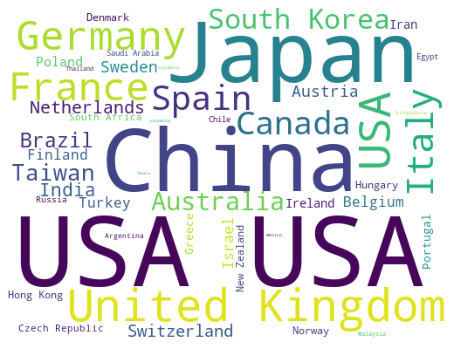

In [227]:
# Figura
plt.subplots(figsize = (8,8))

# Wordcloud
wordcloud = WordCloud(background_color = 'white',
                      width = 512,
                      height = 384).generate(' '.join(df))

plt.imshow(wordcloud)
plt.axis('off')
plt.show()

In [248]:
amor = ('Isabela', 'Linda','Gata', 'Nanica', 'Teamo', 'Chata', 'Gostosa', 'Deusnosabeçoando')

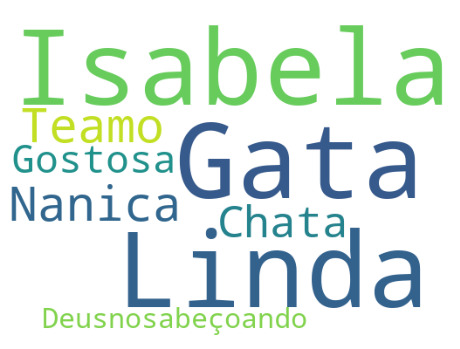

In [249]:
plt.subplots(figsize = (8,8))

# Wordcloud
wordcloud = WordCloud(background_color = 'white',
                      width = 512,
                      height = 384).generate(' '.join(amor))

plt.imshow(wordcloud)
plt.axis('off')
plt.show()

## Sunburst Diagram e Candlesticks com Plotly

In [250]:
# Carregando os dados
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,age_category
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,31-50 Anos
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,31-50 Anos
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,Acima de 50 Anos
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.0,1,1,PP 9549,16.7000,G6,S,Abaixo de 19 Anos
11,12,1,1,"Bonnell, Miss. Elizabeth",female,58.0,0,0,113783,26.5500,C103,S,Acima de 50 Anos


In [251]:
# Carrega os dados
bajaj = pd.read_csv('nifty50-stock-market-data-BAJAJFINSV.csv')
bajaj.head()

,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
0,2008-05-26,BAJAJFINSV,EQ,2101.05,600.00,619.00,501.0,505.1,509.10,548.85,3145446,1.726368e+14,NaN,908264,0.2888
1,2008-05-27,BAJAJFINSV,EQ,509.10,505.00,610.95,491.1,564.0,554.65,572.15,4349144,2.488370e+14,NaN,677627,0.1558
2,2008-05-28,BAJAJFINSV,EQ,554.65,564.00,665.60,564.0,643.0,640.95,618.37,4588759,2.837530e+14,NaN,774895,0.1689
3,2008-05-29,BAJAJFINSV,EQ,640.95,656.65,703.00,608.0,634.5,632.40,659.60,4522302,2.982921e+14,NaN,1006161,0.2225
4,2008-05-30,BAJAJFINSV,EQ,632.40,642.40,668.00,588.3,647.0,644.00,636.41,3057669,1.945929e+14,NaN,462832,0.1514


### Sunburst
**Objetivo**: Exibir a representação quantitativa de muitas variáveis categóricas por distribuição de tamanho.

Descreva a distribuição entre as categorias de idade, sexo e pessoas sobreviventes no que diz respeito à tarifa(fare) no Titanic.

In [252]:
# Prepara os dados
titanic = titanic.dropna()
titanic['age_category'] = np.where((titanic['Age'] < 19), "Abaixo de 19 Anos",
                                 np.where((titanic['Age'] > 18) & (titanic['Age'] <= 30), "19-30",
                                    np.where((titanic['Age'] > 30) & (titanic['Age'] <= 50), "31-50",
                                                np.where(titanic['Age'] > 50, "Acima de 50 Anos", "NULL"))))

age = titanic['age_category'].value_counts().to_frame().reset_index().rename(columns = {'index':'age_category','age_category':'Count'})

titanic['survived_or_not'] = np.where(titanic['Survived']==1,"Survived", np.where(titanic['Survived']==0,"Died","null")) 

sun_df = titanic[['Sex','survived_or_not','Embarked','age_category','Cabin','Fare']].groupby(['Sex','survived_or_not','age_category','Embarked','Cabin']).agg('sum').reset_index()

In [253]:
# Figura
fig = px.sunburst(sun_df, path = ['Sex','survived_or_not','age_category'], values = 'Fare')

# Layout
fig.update_layout(title = "Distribuição de Passageiros Por Faixa Etária, Sexo e Sobrevivência, Por Tarifa", 
                  title_x = 0.5)

# Gráfico
fig.show()

### Sunburst Color

Mesmo gráfico anterior com diferente organização de cores por sobrevivente/não sobrevivente.

In [254]:
# Figura
fig = px.sunburst(sun_df, path = ['Sex','survived_or_not','age_category'], 
                  values = 'Fare', 
                  color = 'survived_or_not',
                  color_discrete_map = {'(?)':'black', 'Died':'red', 'Survived':'darkblue'})

# Layout
fig.update_layout(title = "Distribuição de Passageiros Por Faixa Etária, Sexo e Sobrevivência, Por Tarifa",
                  title_x = 0.5)

# Gráfico
fig.show()

### Candlestick
**objetivo**: Mostrar séries com pontos de alta, baixar, abertura e fechamento (usado para visualizar preços de ações).

Como o preço das ações da empresa Bajaj Finserv flutuou ao longo do Tempo? Exiba com pontos de alta, baixa, abertura e fechamento.

In [255]:
# Figura
fig = go.Figure(data = [go.Candlestick(x = bajaj['Date'],
                                       open = bajaj['Open'],
                                       high = bajaj['High'],
                                       low = bajaj['Low'],
                                       close = bajaj['Close'])])

# Layout
fig.update_layout(title = "Candlestick Series do Preço de Ações da Empresa Bajaj Finsv")

# Gráfico
fig.show()

### Candlestick com Ponto Específico

O mesmo gráfico anterior com uma linha vertical indicando uma data específica.

In [256]:
# Figura
fig = go.Figure(data = [go.Candlestick(x = bajaj['Date'],
                                       open = bajaj['Open'],
                                       high = bajaj['High'],
                                       low = bajaj['Low'],
                                       close = bajaj['Close'])])

# Layout com linha específica
fig.update_layout(title = "Candlestick Series do Preço de Ações da Empresa Bajaj Finsv",
                  xaxis_rangeslider_visible = False,  
                  shapes = [dict(x0 = '2017-01-07', 
                                 x1 = '2017-01-07', 
                                 y0 = 0, 
                                 y1 = 1, 
                                 xref = 'x', 
                                 yref = 'paper',
                                 line_width = 2)],
                  annotations = [dict(x = '2017-01-07', 
                                      y = 0.05, 
                                      xref = 'x', 
                                      yref = 'paper',
                                      showarrow = False, 
                                      xanchor = 'left', 
                                      text = 'Fusão com Empresas Aquiridas')])

# Gráfico
fig.show()

## Gráfico 3D com Plotly

In [257]:
# Vamos usar o world
world.head()

,world_rank,institution,country,national_rank,quality_of_education,alumni_employment,quality_of_faculty,publications,influence,citations,broad_impact,patents,score,year
0,1,Harvard University,USA,1,7,9,1,1,1,1,NaN,5,100.00,2012
1,2,Massachusetts Institute of Technology,USA,2,9,17,3,12,4,4,NaN,1,91.67,2012
2,3,Stanford University,USA,3,17,11,5,4,2,2,NaN,15,89.50,2012
3,4,University of Cambridge,United Kingdom,1,10,24,4,16,16,11,NaN,50,86.17,2012
4,5,California Institute of Technology,USA,4,2,29,7,37,22,22,NaN,18,85.21,2012


In [258]:
campus.head()

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
1,2,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
2,3,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0
3,4,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,NaN
4,5,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0


### 3D Scatter
**Objetivo**: Exibir relação entre 3 variáveis

Como ssc%, hsc% e degree% estão relacionados entre si para alunos empregados e não empregados?

In [259]:
# Figura
fig = px.scatter_3d(campus, x = 'ssc_p', y = 'hsc_p', z = 'degree_p', color = 'status')

# Layout
fig.update_layout(scene = dict(xaxis_title = 'SSC %',
                               yaxis_title = 'HSC %',
                               zaxis_title = 'Degree %'),
                  title = "Percentual de Candidatos Empregados e Não Empregados")

# Gráfico
fig.show()

### 3D Scatter Colorido
**Objetivo**: Exibir relação entre 3 variáveis com forma e cor diferentes.

Mesmo gráfico anterior com shapes e cores diferentes para as variáveis. 

In [260]:
# Figura
fig = px.scatter_3d(campus, 
                    x = 'ssc_p', 
                    y = 'hsc_p', 
                    z = 'degree_p',
                    color = 'etest_p', 
                    size = 'etest_p', 
                    size_max = 18,
                    symbol = 'status', 
                    opacity = 0.7)

# Layout
fig.update_layout(margin = dict(l = 0, r = 0, b = 0, t = 0))

# Gráfico
fig.show()

### 3D Surface
**Objetivo**: Exibir relação de superfície entre diversos valores.

Como as pontuações estão relacionadas entre as universidades dos 20 principais países?

In [261]:
# Prepara os dados
top_countries = world['country'].value_counts()[:20].reset_index()['index']

score = []

for i in top_countries:
    score.append(list(world[world['country']==i]['score']))

z_data = np.array(score)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: VisibleDeprecationWarning:

Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.



In [262]:
# Figura
fig = go.Figure(data = [go.Surface(z = z_data)])

# Layout
fig.update_layout(title = 'Pontuação das Universidades dos 20 Principais Países', 
                  autosize = False,
                  width = 500, 
                  height = 500,
                  margin = dict(l = 65, r = 50, b = 65, t = 90))

# Gráfico
fig.show()

### 3D Line
**Objetivo**: Exibir relação entre 3 variáveis em linhas.

Como se relacionam a população, o PIB e o ano nos países europeus?

In [263]:
# Prepara os dados
df = px.data.gapminder().query("continent=='Europe'")

In [264]:
# Figura
fig = px.line_3d(df, x = "gdpPercap", y = "pop", z = "year", color = 'country')

# Layout
fig.update_layout(title_text = 'População, PIB e Ano na Europa', title_x = 0.5)

# Gráfico
fig.show()